<a href="https://colab.research.google.com/github/gopika20nair/Solubility-Prediction-of-drug-compounds-ML-Demo/blob/main/code/SVM(M).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 26.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AquaSol_Mordred_Descriptors.csv to AquaSol_Mordred_Descriptors.csv


In [ ]:
data = pd.read_csv("AquaSol_Mordred_Descriptors.csv")

In [ ]:
print(data.head())

         ABC      ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A  \
0  15.325998  11.908140    1.0    1.0   0.000000  0.000000  0.000000   
1  10.554231   8.981734    0.0    0.0  17.518892  2.503145  4.873772   
2   6.473351   6.127584    0.0    0.0  11.189958  2.193993  4.387987   
3  40.125717  33.290348    2.0    0.0   0.000000  0.000000  0.000000   
4  25.374964  18.024220    0.0    0.0  42.485220  2.398507  4.736543   

      SpAD_A   SpMAD_A   LogEE_A  ...     TSRW10         MW        AMW  \
0   0.000000  0.000000  0.000000  ...  54.228660  391.28137   5.670744   
1  17.518892  1.347607  3.552497  ...  59.616540  169.05276   8.452639   
2  11.189958  1.243329  3.089765  ...  37.289974  140.00290  10.000207   
3   0.000000  0.000000  0.000000  ...  91.421760  754.22730   7.939235   
4  42.485220  1.370491  4.465186  ...  90.719090  422.22055   6.921648   

          WPath  WPol  Zagreb1  Zagreb2  mZagreb1   mZagreb2  Solubility  
0  2.200002e+09  19.0     88.0     86.0  0.0000

In [ ]:
X = data.iloc[:, :-1]
y = data['Solubility']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')



Mean Squared Error: 5.410776786905512
Root Mean Squared Error: 2.3261076473167597
Mean Absolute Error: 1.8343910949886153
R² Score: 0.0025565739221343753


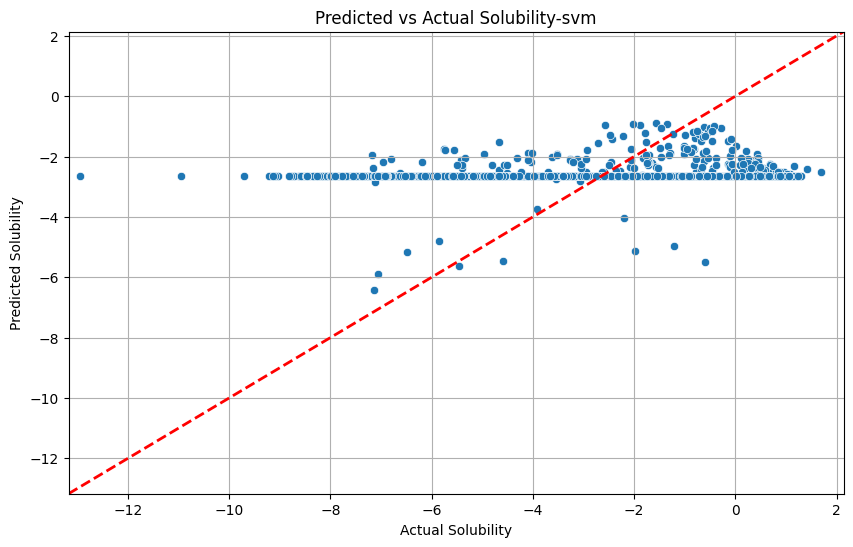

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('Predicted vs Actual Solubility-svm')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid()
plt.show()